In [1]:
# project: p2
# submitter: tjbuck
# partner: none
# hours: 20

In [2]:
import loans
import search
%load_ext autoreload
%autoreload 2

In [3]:
bank = loans.Bank("First Home Bank")

In [4]:
#Q1: what is the average interest rate for the bank?
count = 0
interest_total = 0
for item in bank:
    if item.interest_rate == -1.0:
        continue
    else:
        interest_total += item.interest_rate
        count += 1
        
interest_total/count

2.962962962962963

In [5]:
#Q2: how many applicants are there per loan, on average?
count = 0
applicant_total = 0
for item in bank:
    applicant_total += len(item.applicants)
    count += 1
    
applicant_total/count

1.5777777777777777

In [6]:
#Q3: what is the distribution of ages?
age_dict = dict()
for item in bank:
    for i in item.applicants:
        if i.age not in age_dict:
            age_dict[i.age] = 1
        else:
            age_dict[i.age] += 1
            
age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [7]:
#Q4: how many interest rate values are missing?

interest_tree = search.BST()
for i in bank:
    interest_tree.add(i.interest_rate, i)
len(interest_tree[-1])

18

In [8]:
#Q5: how tall is the tree?

interest_tree.tree_height() # created method in Loan and Bank classes       

9

In [9]:
bank1 = loans.Bank("University of Wisconsin Credit Union")
uwcu_tree = search.BST()
for i in bank1:
    uwcu_tree.add(i.interest_rate, i)

In [10]:
import matplotlib
from time import time
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"] = 18

([<matplotlib.axis.YTick at 0x7f3205082cd0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

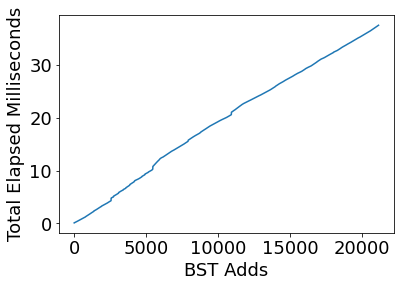

In [11]:
#Q6: how long does it take to add the loans to the tree?
bst = search.BST()
add_dict = dict()
count = 0
t = time()
for item in bank1:
    count += 1
    bst.add(item.interest_rate, item)
    t1 = time()
    add_dict[count] = (t1-t)*1000

add_list = add_dict.items()
x, y = zip(*add_list)

plt.plot(x, y)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")
plt.xticks([0, 5000,10000,15000,20000])
plt.yticks([0, 10, 20, 30])

Text(0, 0.5, 'Milliseconds')

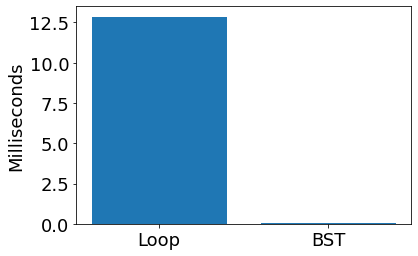

In [12]:
#Q7: how fast are tree lookups?

time0 = time()
count = 0
for i in bank1:
    if i.interest_rate == -1:
        count += 1
time1 = time()
loop = (time1 - time0)*1000

ti0 = time()
len(uwcu_tree[-1])
ti1 = time()
bst = (ti1 - ti0)*1000


time_dict = {"Loop": loop, "BST": bst}
x1 = list(time_dict.keys())
x2 = list(time_dict.values())

plt.bar(x1, x2)
plt.rcParams['font.size'] = 16
plt.ylabel("Milliseconds")
# plt.yticks([2, 4, 6, 8])

([<matplotlib.axis.YTick at 0x7f3203071520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

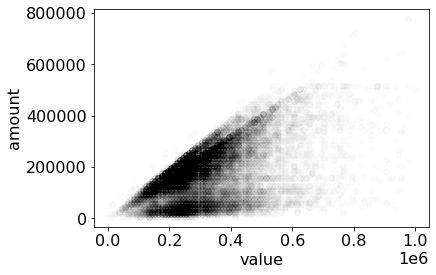

In [13]:
#Q8: what is the relationship between property value and loan amount?


loan_list = list()
value_list = list()
for i in bank1:
    if i.property_value == -1 or i.loan_amount == -1:
        continue
    elif i.property_value <= 1000000:
        value_list.append(i.property_value)
        loan_list.append(i.loan_amount)
    else:
        continue

plt.scatter(value_list,loan_list, c = "black", alpha = 0.01)
plt.xlabel("value")
plt.ylabel("amount")
plt.xticks([0,200000,400000,600000,800000, 1000000])
plt.yticks([0,200000,400000,600000,800000])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

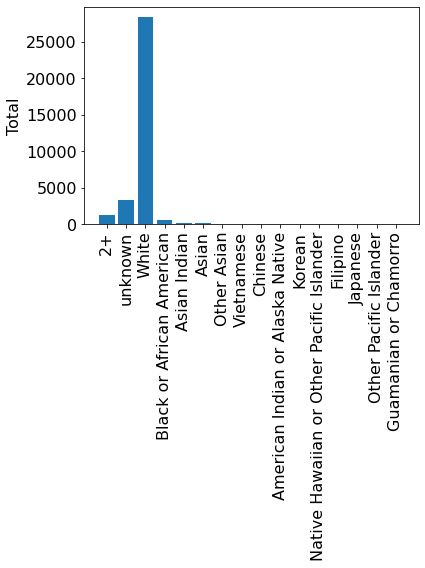

In [14]:
#Q9: what is the distribution of race for UWCU loan applicants?

race_dict = {"2+":0, "unknown":0}
for i in bank1:
    for item in i.applicants:
        if len(item.race) == 1:
            r = list(item.race)
            if r[0] not in race_dict.keys():
                race_dict[r[0]] = 1
            else:
                race_dict[r[0]] += 1
        elif len(item.race) >= 2:
            race_dict["2+"] += 1
        elif len(item.race) == 0:
            race_dict["unknown"] += 1
    

race_list = race_dict.items()
race, number = zip(*race_list)

plt.bar(race, number)
plt.ylabel("Total")
plt.xticks(rotation = 90)

In [15]:
#Q10: how many nodes are in the tree?

uwcu_tree.tree_size()

32